### Student Name: Andrianov Aleksandr
### Student ID: 20033313



- Dataset 1: https://github.com/luminati-io/Social-media-dataset-samples/blob/main/Twitter-%20datasets.csv?h=1
and
- Dataset 2: https://github.com/luminati-io/Social-media-dataset-samples/blob/main/TikTok-datasets.csv


In [1]:
import pandas as pd

def summarize_dataframe(df_name):
    df = pd.read_csv(df_name)
    summary = pd.DataFrame({
        "Column": df.columns,
        "Data Type": [df[col].dtype for col in df.columns],
        "First 3 Values": [df[col].head(3).tolist() for col in df.columns]
    })

    print(f"Summary of {df_name}:")
    print("Dataset size:", df.shape)
    print(summary)

In [2]:
summarize_dataframe("Twitter- datasets.csv")

Summary of Twitter- datasets.csv:
Dataset size: (1000, 26)
                 Column Data Type  \
0                    id     int64   
1           user_posted    object   
2                  name    object   
3           description    object   
4           date_posted    object   
5                photos    object   
6                   url    object   
7          tagged_users    object   
8               replies     int64   
9               reposts     int64   
10                likes     int64   
11                views     int64   
12         external_url    object   
13             hashtags    object   
14            followers     int64   
15            biography    object   
16          posts_count     int64   
17   profile_image_link    object   
18            following     int64   
19          is_verified      bool   
20               quotes     int64   
21            bookmarks     int64   
22  parent_post_details    object   
23  external_image_urls    object   
24              

First dataset (1000 records) sescribes twitter posts and some statistical information related them. It contains columns:

- id: Unique identifier for each post
- user_posted: Username of the post creator
- name: Name of the user who made the comment
- description: Post text description
- date_posted: Post publication date
- photos and videos: URLs of attached resources
- url: The URL of the page or post containing the comments
- replies: Number of direct replies to the comment
- reposts: Number of reposts to the post
- likes: Number of likes
- views: Number of post views (Most interesting for my purposes)
- hashtags: Hashtags used in the post
- followers: Number of an author followers
- posts_count: An author posts count
- profile_image_link: An author image link
- following: Number other authors the post author are following
- is_verified: Is the author account was verified
- bookmarks: Number of bookmarks users set to the post 
- tagged_users: Number of users tagged in the post
- ... and other non interesting for my purposes information

Lets define how these data fields could help me for answering my research questions:

- description – Useful to detect swear words, text length, emojis, grammatical errors, lexical quality, and letter case.
- views – It is the main metric of post popularity for most questions.
- likes – Helps analyze engagement and correlation with comments.
- replies – Highly necessary to check correlation between likes and comments.
- reposts – Additional metric that may support research conclusions.
- date_posted – Required to analyze how posting time affects popularity.
- photos and videos – Allows checking whether having photos increases popularity.
- user_posted – To evaluate if username readability affects engagement.
- name – Additional user information, useful to compare human-readable names.
- followers – Used to determine whether follower count impacts post popularity.
- profile_image_link – Allows checking whether having a profile picture affects popularity.
- hashtags – May help to control for topic variation when analyzing other factors.
- bookmarks - Can help to define popularity of a post by number of bookmarks 
- tagged_users - It can show corellation between popularity a post

So, if try to answer problem staitment the dataset could be devide for two groups: 
- target features : views, likes, replies, reposts, bookmarks - These are dataset features that show the result of the content of other features and thus are an indicator of their combinations - that is, the result of a certain function of several variables.
- independent variables: description, date_posted, photos, videos, user_posted, name, followers, profile_image_link, hashtags, tagged_users - Predictors (input features, independent) - data that directly influences the result and where it is necessary to identify patterns and relationships to solve the work problem.

In [3]:
summarize_dataframe("TikTok-datasets.csv")

Summary of TikTok-datasets.csv:
Dataset size: (1000, 13)
                 Column Data Type  \
0                   url    object   
1              post_url    object   
2               post_id     int64   
3     post_date_created    object   
4          date_created    object   
5          comment_text    object   
6             num_likes     int64   
7           num_replies     int64   
8   commenter_user_name    object   
9          commenter_id     int64   
10        commenter_url    object   
11           comment_id     int64   
12          comment_url    object   

                                       First 3 Values  
0   [https://www.tiktok.com/@dr.jubairsfinance/vid...  
1   [https://www.tiktok.com/@dr.jubairsfinance/vid...  
2   [7381541963469786401, 7411581429219364128, 741...  
3   ["2024-06-17T18:32:51.000Z", "2024-09-06T17:21...  
4   ["2024-06-17T20:00:29.000Z", "2024-09-08T10:21...  
5   [What is the dividend yield on this fund ?, To...  
6                               

Second dataset (1000 records) is same as the first. It consists of ticktok comments and some metrics that could help me to answer research questions:

- post_id: unique ID for each post; 
- post_date_created: timestamp of the post creation; allows analysis of whether posting time affects engagement.
- comment_text: most important metric to analyze text length, presence of swear words, emojis, grammar quality, and text case.
- num_likes: measures engagement with a comment or post; used to study popularity patterns.
- num_replies: indicates how interactive a comment or post is; used to test correlations between likes and replies.
- commenter_user_name: useful for evaluating whether username readability or style influences engagement.
- commenter_id: identifies unique users; helpful for grouping activity and linking to user-level metrics if available.
- date_created: post timestamp — helps measure how timing affects engagement on comments.

Two groups features:
- target features : num_likes, num_replies
- independent variables: post_date_created, comment_text, commenter_user_name, date_created


## 2.1. Data Preprocessing

In [4]:
import pandas as pd

def take_features_by_name(data_frame_name, features_to_keep):
    df = pd.read_csv(data_frame_name)
    return df.loc[:, df.columns.intersection(features_to_keep)]


In [5]:
columns_to_keep = [
    'id',
    'user_posted',
    'name',
    'description',
    'date_posted',
    'photos',
    'url',
    'replies',
    'reposts',
    'likes',
    'views',
    'hashtags',
    'followers',
    'biography',
    'posts_count',
    'profile_image_link',
    'following',
    'is_verified',
    'bookmarks',
    'tagged_users',
    'videos'
]
twitter_selected_df = take_features_by_name("Twitter- datasets.csv", columns_to_keep)
print("Dataset size:", twitter_selected_df.shape)

Dataset size: (1000, 21)


In [6]:
columns_to_keep = [
    'post_id',
    'post_date_created',
    'comment_text',
    'num_likes',
    'num_replies',
    'commenter_user_name',
    'commenter_id',
    'date_created'
]

tiktok_selected_df = take_features_by_name("TikTok-datasets.csv", columns_to_keep)
print("Dataset size:", tiktok_selected_df.shape)

Dataset size: (1000, 8)


### 2.1.1.1 Missing values

These values can decrease quality of models, and it it needs to remove them from datasets.

In [7]:
import pandas as pd
import numpy as np

def enumerate_missing_values(df):
    result = []

    for col in df.columns:
        series = df[col]

        # Numeric column
        if pd.api.types.is_numeric_dtype(series):
            missing = series.isna().sum()
            total = len(series)
            percent = missing / total * 100

        # non numeric column
        else:
            missing = series.isnull().sum()
            total = len(series)
            percent = missing / total * 100

        result.append([col, missing, percent])

    return pd.DataFrame(result, columns=["Column", "Missing Count", "Percent Missing"])


In [8]:
enumerate_missing_values(twitter_selected_df)

,Column,Missing Count,Percent Missing
0,id,0,0.0
1,user_posted,0,0.0
2,name,0,0.0
3,description,0,0.0
4,date_posted,0,0.0
5,photos,544,54.4
6,url,0,0.0
7,tagged_users,626,62.6
8,replies,0,0.0
9,reposts,0,0.0


So, the twitter dataset has four features with missed values: photos, videos, hashtags and biograpy - it would be important to erase rows with missed values when research questions will need them to analysis

In [9]:
enumerate_missing_values(tiktok_selected_df)

,Column,Missing Count,Percent Missing
0,post_id,0,0.0
1,post_date_created,0,0.0
2,date_created,0,0.0
3,comment_text,0,0.0
4,num_likes,0,0.0
5,num_replies,0,0.0
6,commenter_user_name,0,0.0
7,commenter_id,0,0.0


Tiktok dataset doesn't have missed values at all

### 2.1.1.2 Outliers

It can distort statistical measures and harm ML models, but it depends on dataset specifics and often it can provide valuable contribution to models quality (Han, Pei and Tong, 2022).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_numeric_boxplots(df, cols_per_row=4, drop_cols=None):
    if drop_cols is not None:
        df = df.drop(columns=drop_cols, errors='ignore')

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    n = len(numeric_cols)
    rows = (n + cols_per_row - 1)

    plt.figure(figsize=(cols_per_row * 4, rows * 4))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols_per_row, i)
        plt.boxplot(df[col].dropna())
        plt.title(col)
        plt.tight_layout()

    plt.show()

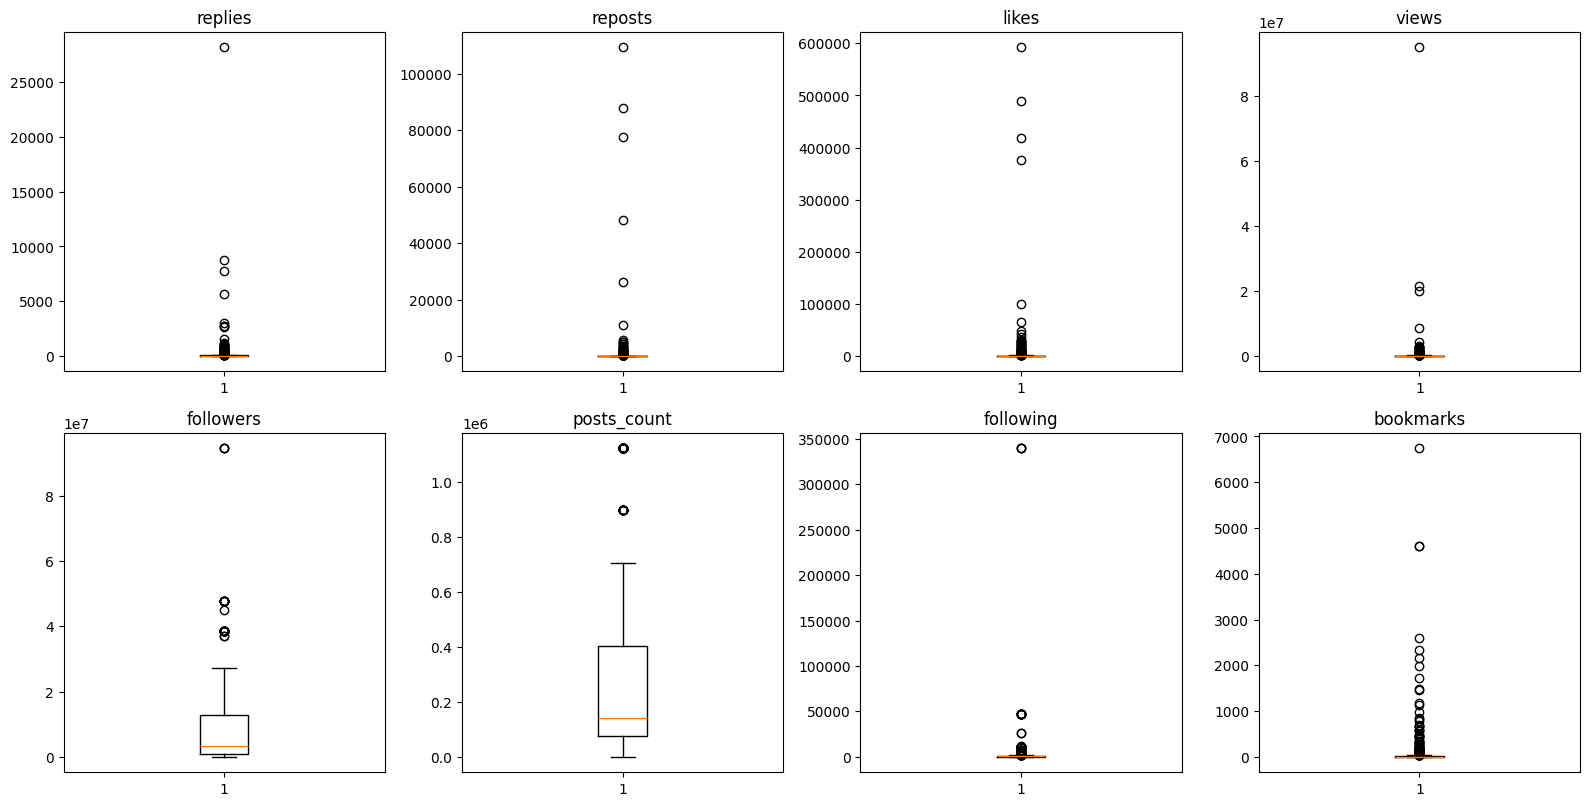

In [11]:
plot_numeric_boxplots(twitter_selected_df, drop_cols=['id'])

In [12]:
import pandas as pd

def outlier_percentages(df, drop_cols=None):
    if drop_cols is not None:
        df = df.drop(columns=drop_cols, errors='ignore')

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    outlier_info = {}

    for col in numeric_cols:
        series = df[col].dropna()
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = series[(series < lower_bound) | (series > upper_bound)]
        percent = len(outliers) / len(series) * 100

        outlier_info[col] = round(percent, 2)

    return pd.DataFrame.from_dict(outlier_info, orient='index',
                                  columns=["Outliers (%)"])

In [13]:
outlier_percentages(twitter_selected_df, drop_cols=['id'])

,Outliers (%)
replies,12.9
reposts,15.3
likes,14.3
views,13.2
followers,4.9
posts_count,10.9
following,15.9
bookmarks,14.0


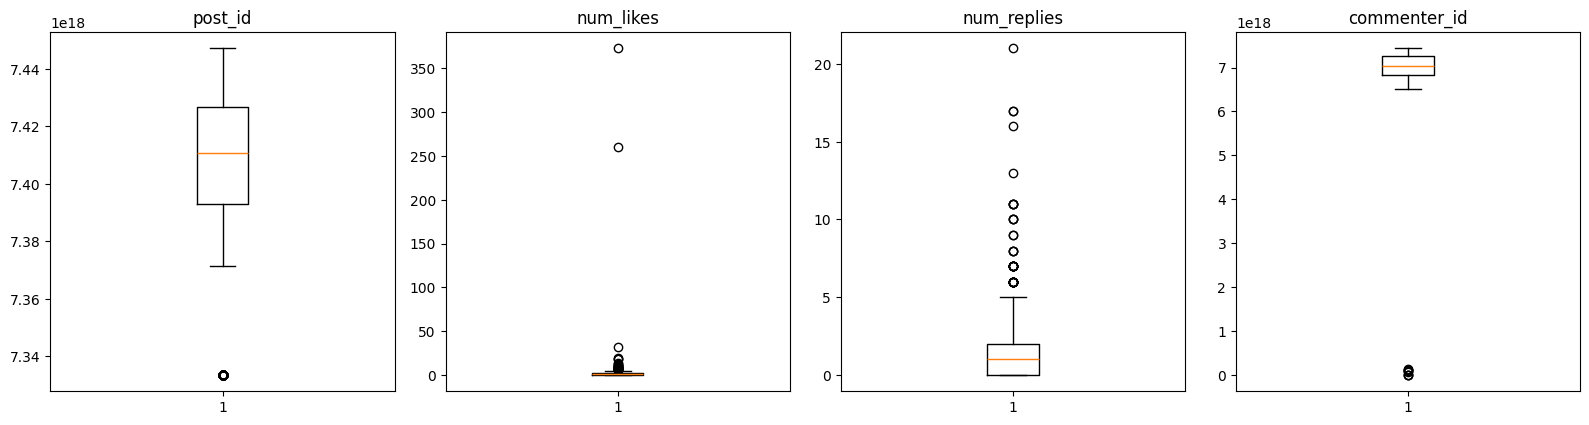

,Outliers (%)
post_id,12.4
num_likes,2.7
num_replies,3.9
commenter_id,0.9


In [14]:
plot_numeric_boxplots(tiktok_selected_df, drop_cols=['id'])
outlier_percentages(tiktok_selected_df, drop_cols=['id'])

### 2.1.1.3 Duplicate Data


In [15]:
def define_dublicates(df):
    duplicate_count = df.duplicated().sum()
    total_count = len(df)
    percent_duplicates = (duplicate_count / total_count) * 100

    return pd.DataFrame({
        "Total Rows": [total_count],
        "Duplicate Rows": [duplicate_count],
        "Percent Duplicates (%)": [round(percent_duplicates, 2)]
    })

In [16]:
define_dublicates(twitter_selected_df)

,Total Rows,Duplicate Rows,Percent Duplicates (%)
0,1000,0,0.0


In [17]:
define_dublicates(tiktok_selected_df)

,Total Rows,Duplicate Rows,Percent Duplicates (%)
0,1000,0,0.0


Both datasets don't have dublicate data.

### 2.1.5.1 Date to numerical.


In [18]:

def transform_date_to_local_hour(df, date_column):
    df[date_column] = df[date_column].astype(str).str.strip()
    df[date_column] = df[date_column].str.replace('^"|"$', '', regex=True)
    df[date_column] = pd.to_datetime(df[date_column], utc=True, errors='coerce')
    df[date_column] = df[date_column].dt.tz_convert(None).dt.hour

    df[date_column] = df[date_column].fillna(-1).astype(int)
    print(df[date_column].head())

In [19]:
transform_date_to_local_hour(twitter_selected_df, 'date_posted')
transform_date_to_local_hour(tiktok_selected_df, 'post_date_created')
transform_date_to_local_hour(tiktok_selected_df, 'date_created')

0    22
1     5
2     0
3    23
4    22
Name: date_posted, dtype: int64
0    18
1    17
2    17
3    15
4    14
Name: post_date_created, dtype: int64
0    20
1    10
2     8
3    16
4    15
Name: date_created, dtype: int64


### 2.1.5.2 Ranges to numerical features

In [20]:
import ast
import pandas as pd

def convert_array_string_to_count(df, column):
    def to_count(x):
        if x is None or pd.isna(x):
            return 0

        if isinstance(x, list):
            return len(x)
        
        if isinstance(x, str):
            x = x.strip()
            
            if x.startswith('[') and x.endswith(']'):
                try:
                    parsed = ast.literal_eval(x)
                    if isinstance(parsed, list):
                        return len(parsed)
                except:
                    return 0

        return 0
    
    df[column] = df[column].apply(to_count)

In [21]:
convert_array_string_to_count(twitter_selected_df, 'photos')
print(twitter_selected_df['photos'].head())

0    0
1    0
2    0
3    1
4    0
Name: photos, dtype: int64


In [22]:
convert_array_string_to_count(twitter_selected_df, 'videos')
print(twitter_selected_df['videos'].head())

0    1
1    0
2    1
3    0
4    1
Name: videos, dtype: int64


### 2.1.5.3 String array to numerical


In [23]:
import pandas as pd
import ast

print(twitter_selected_df['hashtags'].head())

def count_tags(x):
    if pd.isna(x) or x is None:
        return 0
    
    if isinstance(x, list):
        return len(x)
    
    if isinstance(x, str):
        try:
            parsed = ast.literal_eval(x)
            if isinstance(parsed, list):
                return len(parsed)
        except:
            return 0
    return 0

twitter_selected_df['hashtags'] = twitter_selected_df['hashtags'].apply(count_tags)
print(twitter_selected_df['hashtags'].head())

0    ["GloboNews","GloboNewsInternacional"]
1                                       NaN
2                                ["Ligue1"]
3                                       NaN
4         ["GloboNews","EspecialDeDomingo"]
Name: hashtags, dtype: object
0    2
1    0
2    1
3    0
4    2
Name: hashtags, dtype: int64


### 2.1.4.1 Grammar mistakes in texts

In [24]:
import language_tool_python
import pandas as pd

tool = language_tool_python.LanguageTool('en-US')

def count_and_correct(text):
    if not isinstance(text, str) or text.strip() == '':
        return 0, text

    matches = tool.check(text)
    error_count = len(matches)

    corrected_text = language_tool_python.utils.correct(text, matches)
    return error_count, corrected_text

def process_df(df, text_column):
    print(df[text_column].head())

    errors = []
    corrected_texts = []

    for text in df[text_column]:
        count, corrected = count_and_correct(text)
        errors.append(count)
        corrected_texts.append(corrected)

    df[text_column + '_error_count'] = errors
    df[text_column] = corrected_texts

    print(df[text_column].head())
    print(df[text_column + '_error_count'].head())


In [25]:
process_df(twitter_selected_df, 'description')
process_df(tiktok_selected_df, 'comment_text')

0    Com o fim da ditadura Assad, muitos sírios con...
1    Brian Austin Green Tells MGK to ‘Grow Up’ Afte...
2    VENCE O PSG NO CLÁSSICO! 💪🇫🇷 Nossa @claalbuque...
3    ÍDOLO E AGORA PRESIDENTE! 🇦🇷🇦🇷 O ex-atacante D...
4    .@DanielaLima_ : cirurgia de Lula travou negoc...
Name: description, dtype: object
0    Com o FIM the Isadora Assad, moots Sirius cons...
1    Brian Austin Green Tells MGK to ‘Grow Up’ Afte...
2    HENCE O PSG NO CLASSIC! 💪🇫🇷 Fossa @claalbuquer...
3    IDOL E AGORA PRESIDENT! 🇦🇷🇦🇷 O ex-Alicante Die...
4    .@DanielaLima_ : chirurgic de Lula travel nego...
Name: description, dtype: object
0    24
1     0
2    22
3     9
4     8
Name: description_error_count, dtype: int64
0            What is the dividend yield on this fund ?
1                      Too much stress with stocks bro
2    wouldn't really call it a crash , maybe use th...
3          Delivery hero.. wish I’d put kkkk in that 🤣
4    I made $82,000 in 7 days investing in trading ...
Name: comment_text, dtype

### 2.1.4.2 Number of swear words


In [26]:
from better_profanity import profanity
import pandas as pd

profanity.load_censor_words()

def count_swear_words(text):
    if not isinstance(text, str):
        return 0
    words = text.lower().split()
    return sum(profanity.contains_profanity(word) for word in words)

def add_swear_word_count(df, text_column):
    df['swear_word_count'] = df[text_column].apply(count_swear_words)
    print(df['swear_word_count'].head())
    total_swear_words = df['swear_word_count'].sum()
    print(f"Total swear words found in dataset: {total_swear_words}")


In [27]:
add_swear_word_count(twitter_selected_df, 'description')
add_swear_word_count(tiktok_selected_df, 'comment_text')

0    0
1    0
2    0
3    0
4    0
Name: swear_word_count, dtype: int64
Total swear words found in dataset: 12
0    0
1    0
2    0
3    1
4    0
Name: swear_word_count, dtype: int64
Total swear words found in dataset: 21


### 2.1.4.3 Enumerate size of texts

To answer rq - 2. Does the amount of text in a topic affect its number of views? It will be useful to calculate size of texts and introduce new feature describing it.

In [28]:
import re
import pandas as pd

def count_words(text):
    if not isinstance(text, str):
        return 0
    
    words = re.findall(r"\b\w+\b", text, flags=re.UNICODE)
    return len(words)

def add_word_count(df, text_column, new_column='word_count'):
    df[new_column] = df[text_column].apply(count_words)
    print(df[new_column].head())


In [29]:
add_word_count(twitter_selected_df, 'description')
add_word_count(tiktok_selected_df, 'comment_text')

0    38
1    18
2    39
3    18
4    18
Name: word_count, dtype: int64
0     8
1     6
2    30
3     9
4    18
Name: word_count, dtype: int64


### 2.1.4.4 Number of emojis

In [30]:
import re

emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"   # symbols & pictographs
    "\U0001F680-\U0001F6FF"   # transport & map
    "\U0001F1E0-\U0001F1FF"   # flags
    "\U00002700-\U000027BF"   # dingbats
    "\U0001F900-\U0001F9FF"   # supplemental symbols
    "\U0001FA70-\U0001FAFF"   # symbols extended
    "\U00002600-\U000026FF"   # misc symbols
    "]+", 
    flags=re.UNICODE
)

def count_emojis(text):
    if not isinstance(text, str):
        return 0
    return len(emoji_pattern.findall(text))

def add_emoji_count(df, text_column):
    df['emoji_count'] = df[text_column].apply(count_emojis)
    print(df['emoji_count'].head())

In [31]:
add_emoji_count(twitter_selected_df, 'description')
add_emoji_count(tiktok_selected_df, 'comment_text')

0    1
1    0
2    1
3    2
4    1
Name: emoji_count, dtype: int64
0    0
1    0
2    0
3    1
4    0
Name: emoji_count, dtype: int64


### 2.1.4.5 Number of upper case words


In [32]:
import re

def count_uppercase_words(text):
    if not isinstance(text, str):
        return 0

    upper_words = re.findall(r'\b[A-Z]{2,}\b', text)
    return len(upper_words)

def add_uppercase_word_count(df, text_column):
    df['uppercase_word_count'] = df[text_column].apply(count_uppercase_words)
    print(df['uppercase_word_count'].head())

In [33]:
add_uppercase_word_count(twitter_selected_df, 'description')
add_uppercase_word_count(tiktok_selected_df, 'comment_text')

0    4
1    1
2    6
3    3
4    0
Name: uppercase_word_count, dtype: int64
0    0
1    0
2    0
3    1
4    1
Name: uppercase_word_count, dtype: int64


## 2.2. Data exploratory analysis

### 2.2.1. Feature Relationships with the Target Variable (Graph)

In [34]:
import matplotlib.pyplot as plt

def plot_numeric_features(df, target_column, xSize=18, ySize=12):
    numeric_features = df.select_dtypes(include=['number']).columns.tolist()
    numeric_features = [col for col in numeric_features if col != target_column]

    print(f"Found {len(numeric_features)} numeric features.")

    n_features = len(numeric_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(xSize, ySize))
    axs = axs.flatten()

    for i, feature in enumerate(numeric_features):
        axs[i].scatter(df[feature], df[target_column], alpha=0.2)
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel(target_column)

    for j in range(i + 1, n_rows * n_cols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

Found 17 numeric features.


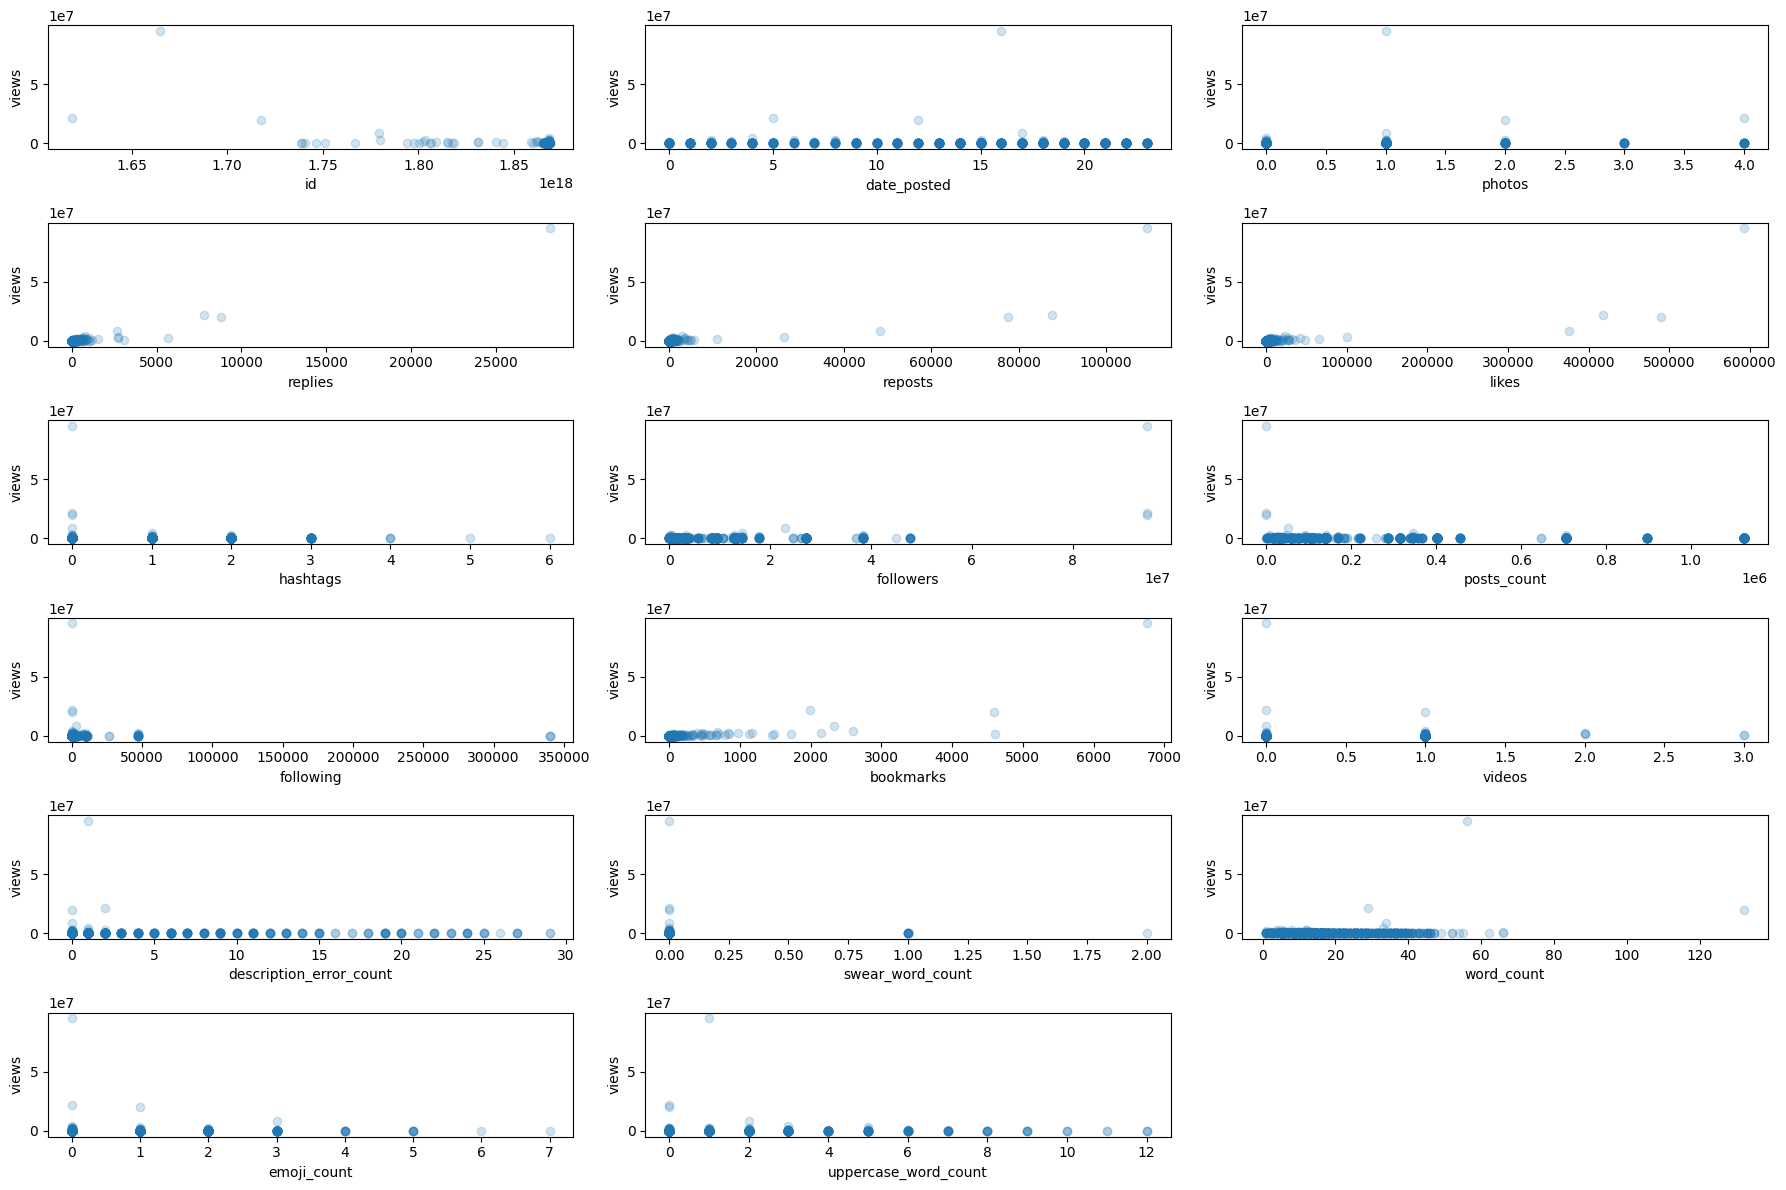

Found 10 numeric features.


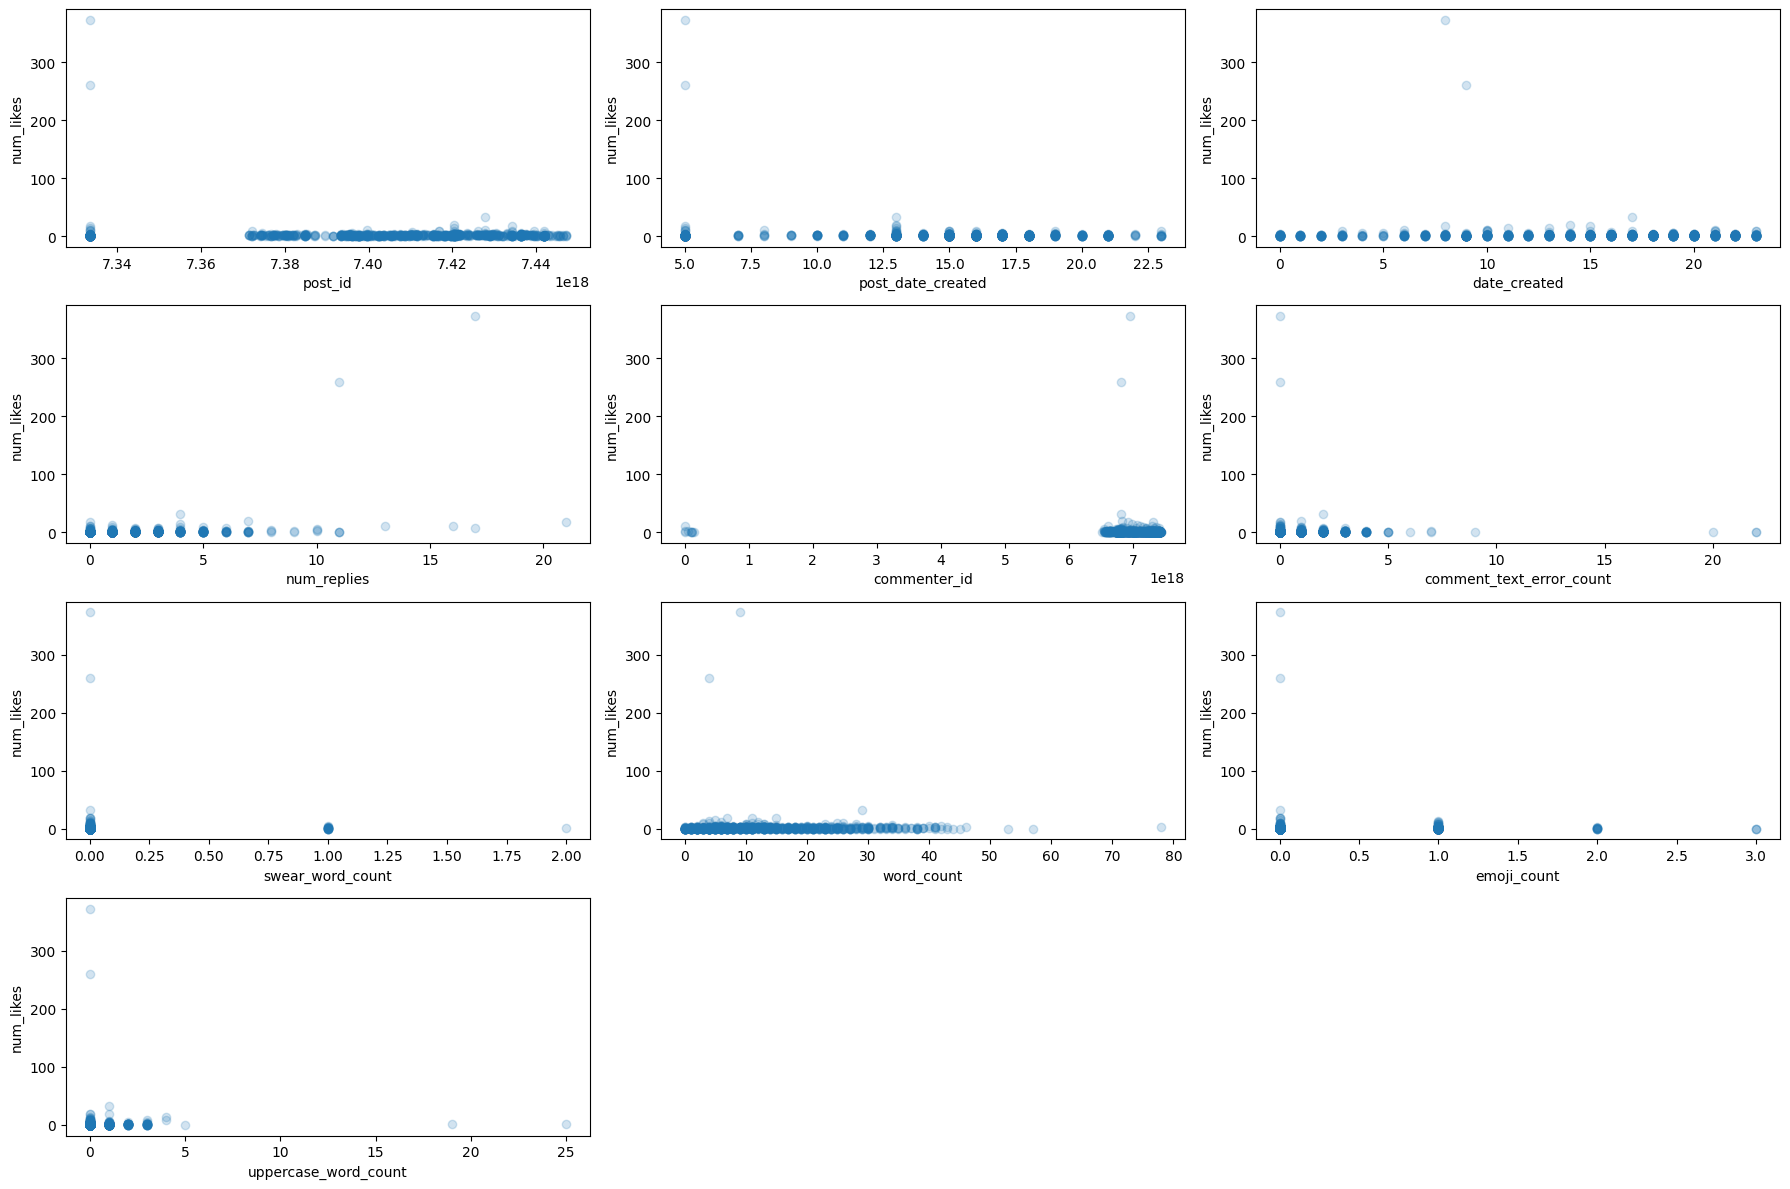

In [35]:
plot_numeric_features(twitter_selected_df, 'views')
plot_numeric_features(tiktok_selected_df, 'num_likes')

### 2.2.2 Correlations


In [36]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def showCorrelations(df):
    numeric_df = df.select_dtypes(include=['number']).copy()

    cols_to_drop = ['id', 'post_id']
    numeric_df = numeric_df.drop(columns=[c for c in cols_to_drop if c in numeric_df.columns], errors='ignore')

    if numeric_df.shape[1] < 2:
        return

    corrMatrix = numeric_df.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corrMatrix,
        annot=False,
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        square=True
    )
    
    plt.show()



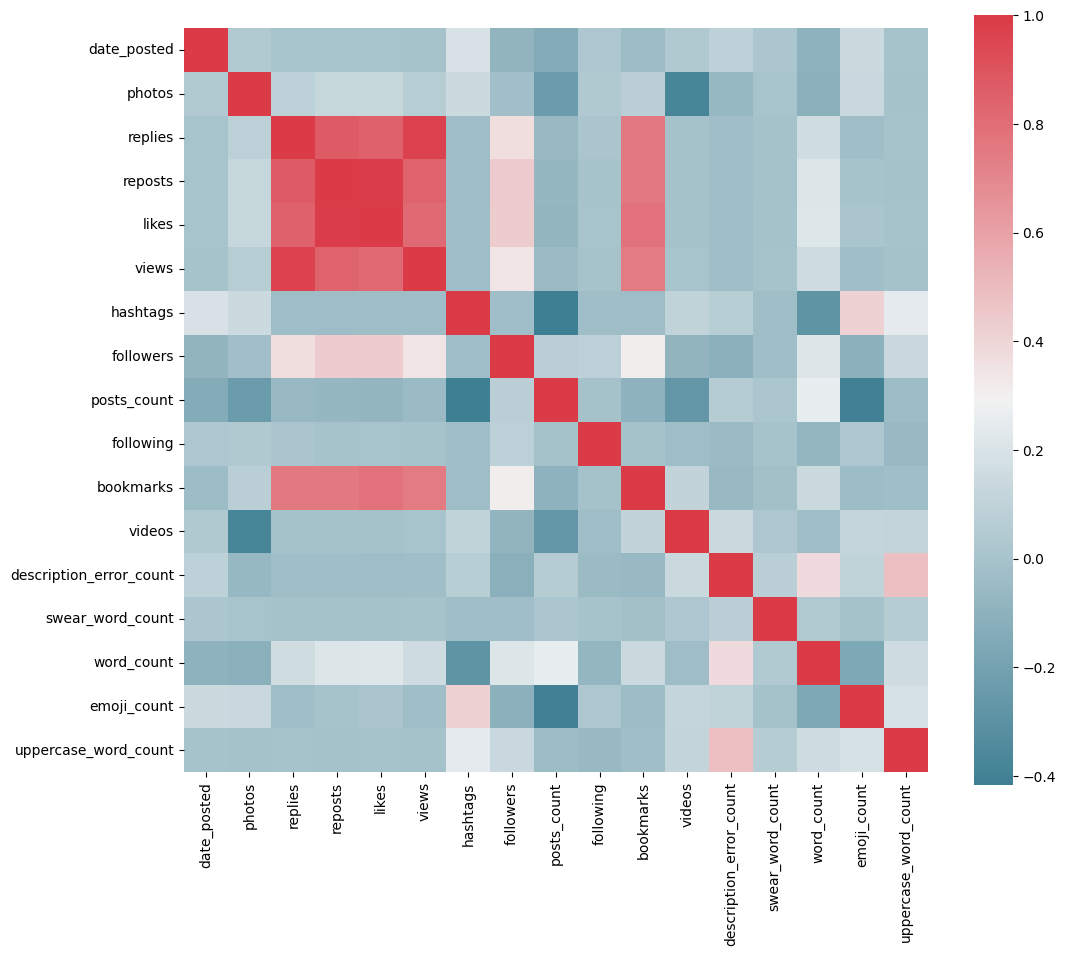

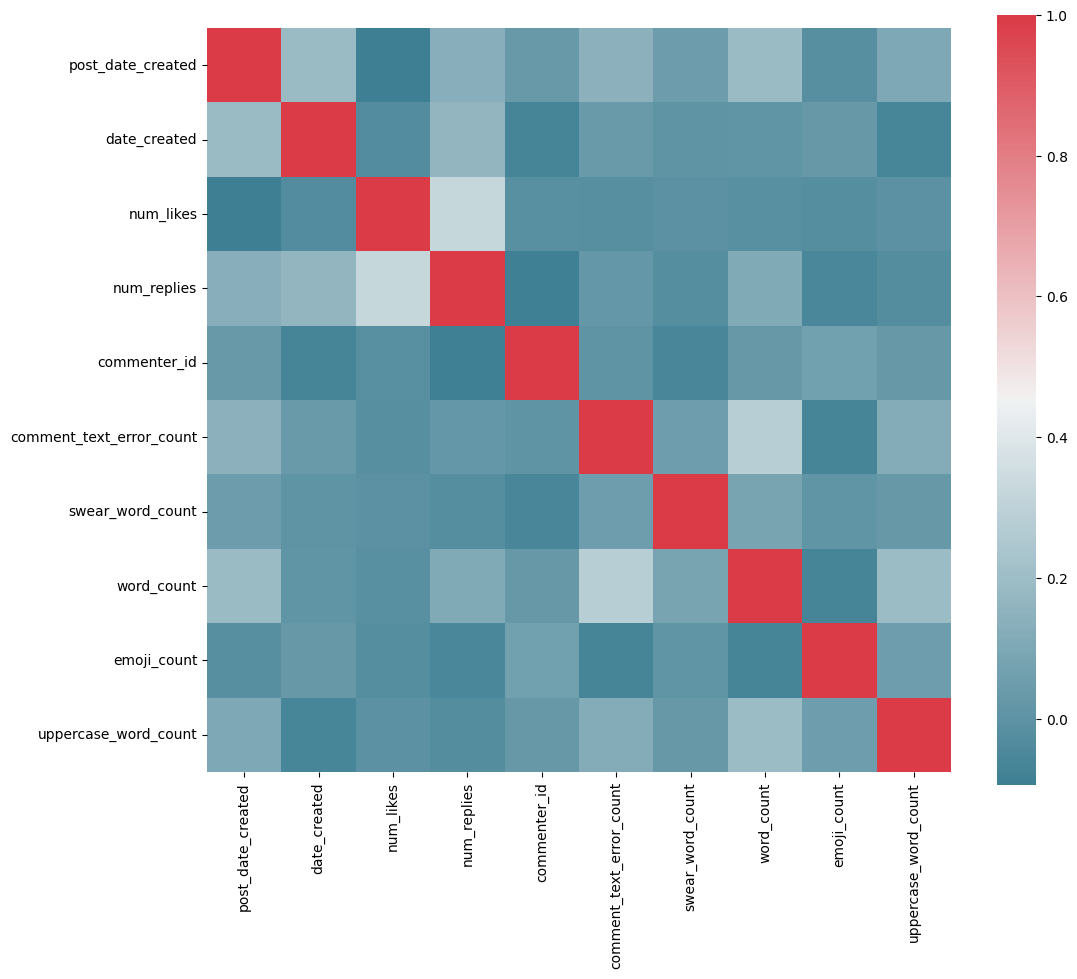

In [37]:
showCorrelations(twitter_selected_df)
showCorrelations(tiktok_selected_df)

# 3. ML Models evaluating

In [38]:
import pandas as pd

def erase_non_numeral_features(df):
    numeric_df = df.select_dtypes(include=['number']).copy()

    cols_to_drop = ['id', 'post_id']
    numeric_df = numeric_df.drop(columns=[c for c in cols_to_drop if c in numeric_df.columns], errors='ignore')
    return numeric_df

In [39]:
twitter_numeral_df = erase_non_numeral_features(twitter_selected_df)
tiktok_numeral_df = erase_non_numeral_features(tiktok_selected_df)

## 3.1. Splitting to training and test sets<a class="anchor"></a>

In [40]:
from sklearn.model_selection import train_test_split as sk_train_test_split

def split_dataset(df, target_columns, test_size=0.15, random_state=42):
    X = df.drop(columns=target_columns)
    y = df[target_columns]

    xTrain, xTest, yTrain, yTest = sk_train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state
    )

    return xTrain, xTest, yTrain, yTest

In [41]:
xTrainTwitter, xTestTwitter, yTrainTwitter, yTestTwitter = split_dataset(
    twitter_numeral_df,
    target_columns=['views', 'replies', 'likes', 'reposts', 'bookmarks']
)
print(xTrainTwitter.shape)
print(yTrainTwitter.shape)
print(xTestTwitter.shape)
print(yTestTwitter.shape)

(850, 12)
(850, 5)
(150, 12)
(150, 5)


## 3.2 XGBRegressor

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

from xgboost import XGBRegressor


In [43]:
def plotPredictions(yTest, yPred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(yTest, yPred, alpha=0.7, edgecolor='k')
    plt.plot([yTest.min(), yTest.max()],
             [yTest.min(), yTest.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.grid(True)
    plt.show()


def plotResiduals(yTest, yPred, title):
    residuals = yTest - yPred
    plt.figure(figsize=(8, 6))
    plt.scatter(yPred, residuals, alpha=0.7, edgecolor='k')
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.title(f"{title}: Residuals")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()


def plotResidualDistribution(yTest, yPred, title):
    residuals = yTest - yPred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"{title}: Residual distribution")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


In [44]:
def modelQualityCheckMulti(yTest, yPred, modelName):
    n_targets = yTest.shape[1]

    for i in range(n_targets):
        y_true_i = yTest.iloc[:, i]
        y_pred_i = yPred[:, i]

        mse = mean_squared_error(y_true_i, y_pred_i)
        r2 = r2_score(y_true_i, y_pred_i)

        print(f"\n Target {yTest.columns[i]}")
        print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

        plotPredictions(
            y_true_i,
            y_pred_i,
            f"{modelName} — {yTest.columns[i]}"
        )

        plotResiduals(
            y_true_i,
            y_pred_i,
            f"{modelName} — {yTest.columns[i]}"
        )

        plotResidualDistribution(
            y_true_i,
            y_pred_i,
            f"{modelName} — {yTest.columns[i]}"
        )

In [45]:
def makeModelAssumptionMulti(
    xTrain, xTest,
    yTrain, yTest,
    model, paramGrid,
    modelName,
    crossValidationFolds=3
):
    gridSearch = GridSearchCV(
        estimator=model,
        param_grid=paramGrid,
        cv=crossValidationFolds,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    gridSearch.fit(xTrain, yTrain)

    bestModel = gridSearch.best_estimator_

    print("Best Parameters:")
    for k, v in gridSearch.best_params_.items():
        print(f"  {k}: {v}")

    y_pred = bestModel.predict(xTest)

    modelQualityCheckMulti(yTest, y_pred, modelName)


In [46]:
xgb_base = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

multi_xgb = MultiOutputRegressor(xgb_base)


In [47]:
paramGridXGB = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [3, 5],
    'estimator__learning_rate': [0.05, 0.1],
    'estimator__subsample': [0.8, 1.0],
    'estimator__colsample_bytree': [0.8, 1.0]
}


Best Parameters:
  estimator__colsample_bytree: 0.8
  estimator__learning_rate: 0.05
  estimator__max_depth: 5
  estimator__n_estimators: 100
  estimator__subsample: 0.8

 Target views
MSE: 13178422427648.0000, R²: -3.9169


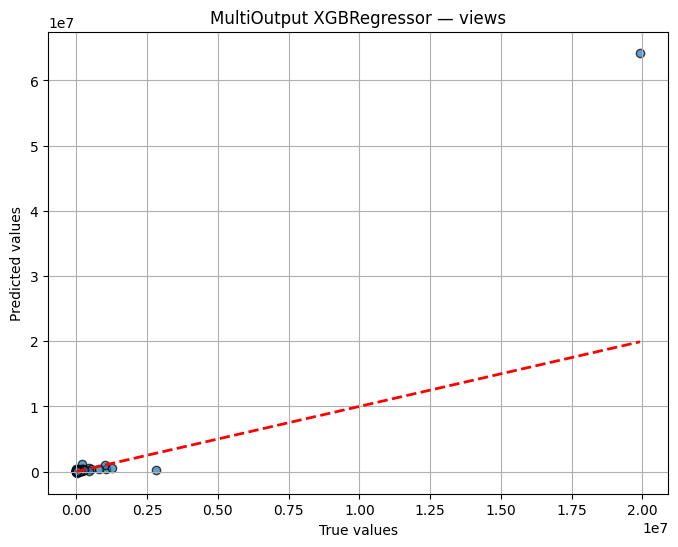

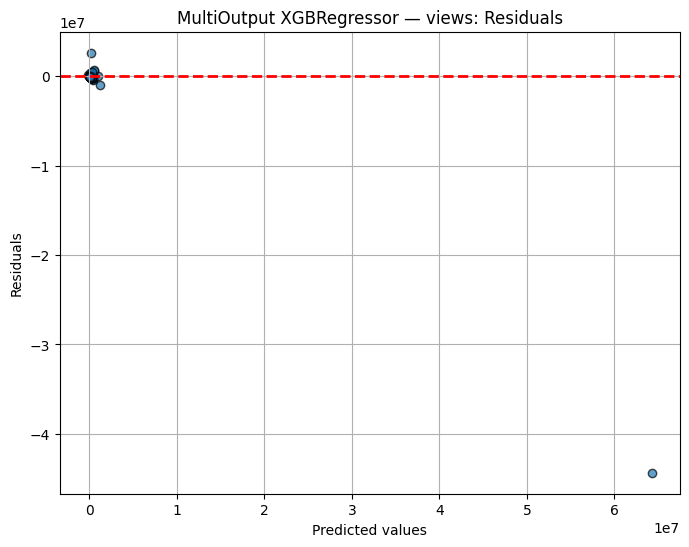

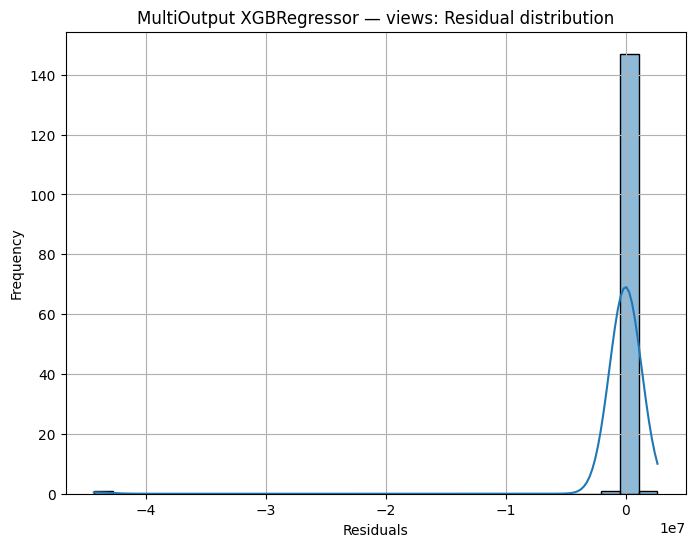


 Target replies
MSE: 860906.2500, R²: -0.6153


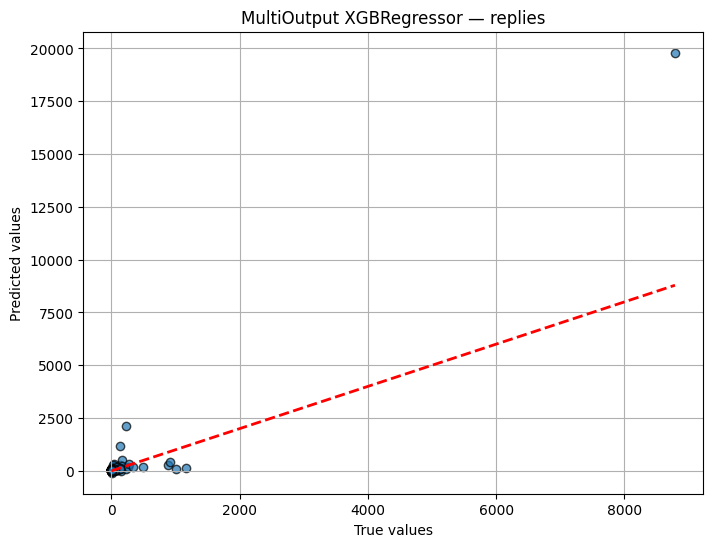

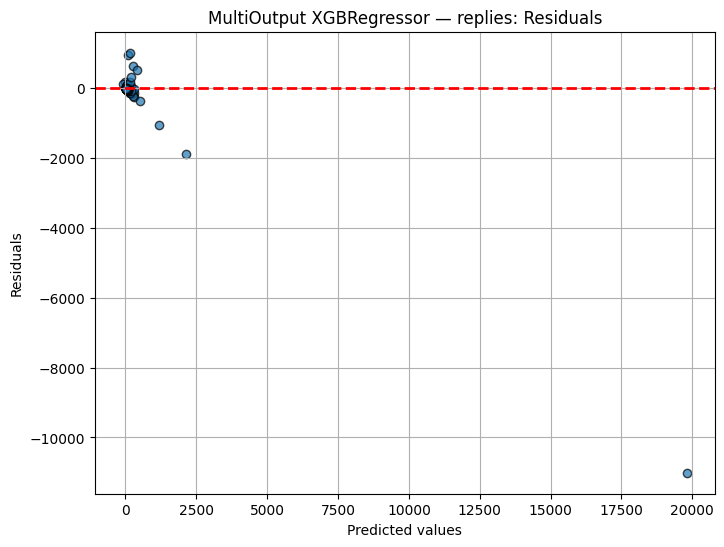

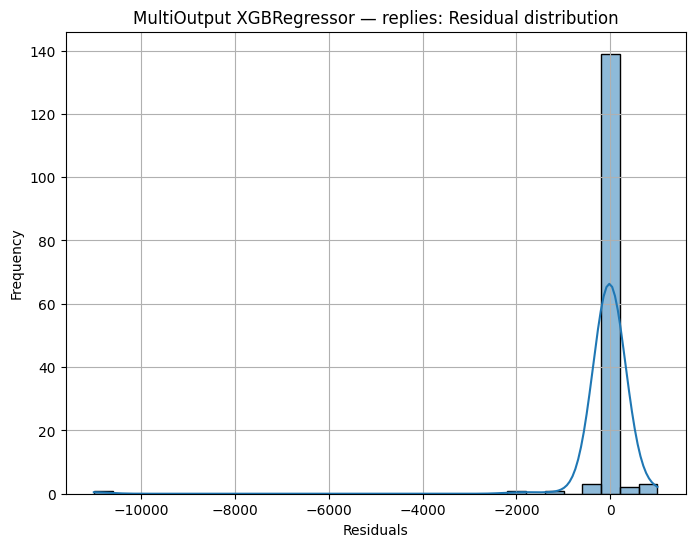


 Target likes
MSE: 68423392.0000, R²: 0.9580


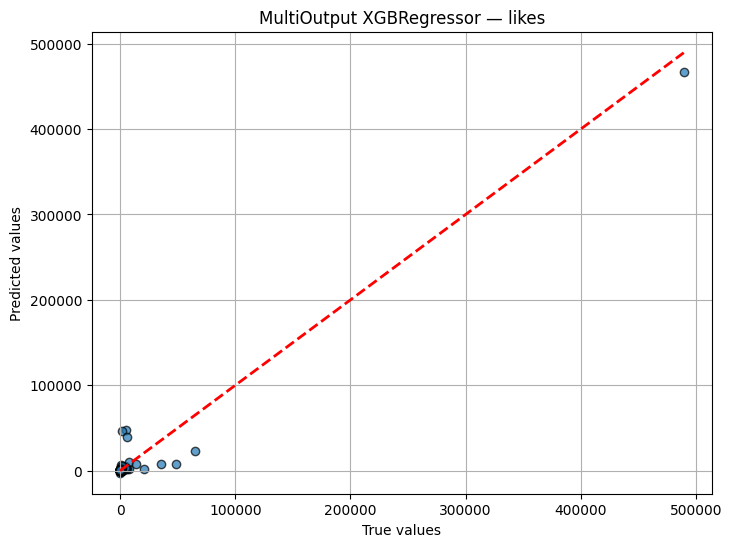

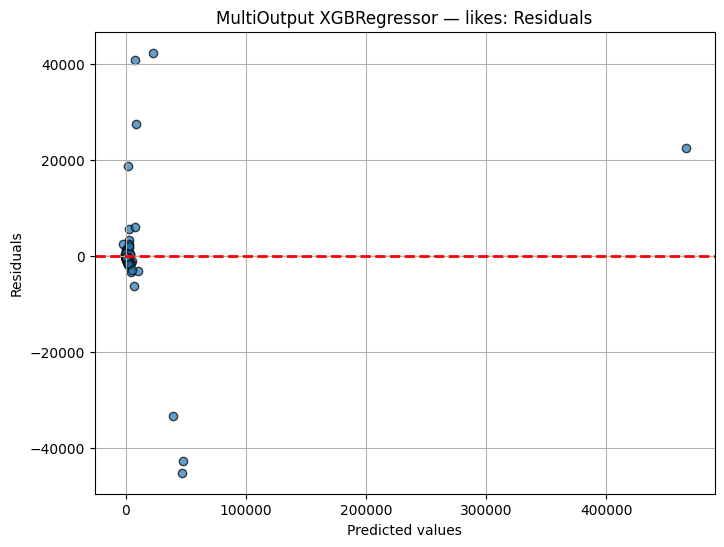

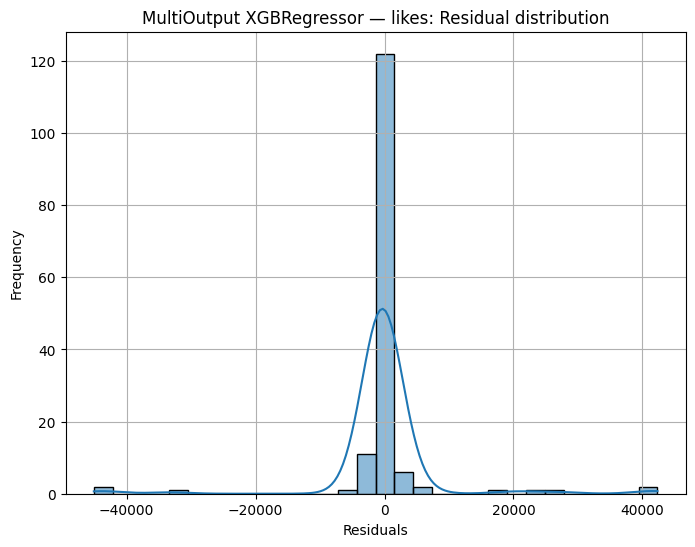


 Target reposts
MSE: 2649844.0000, R²: 0.9350


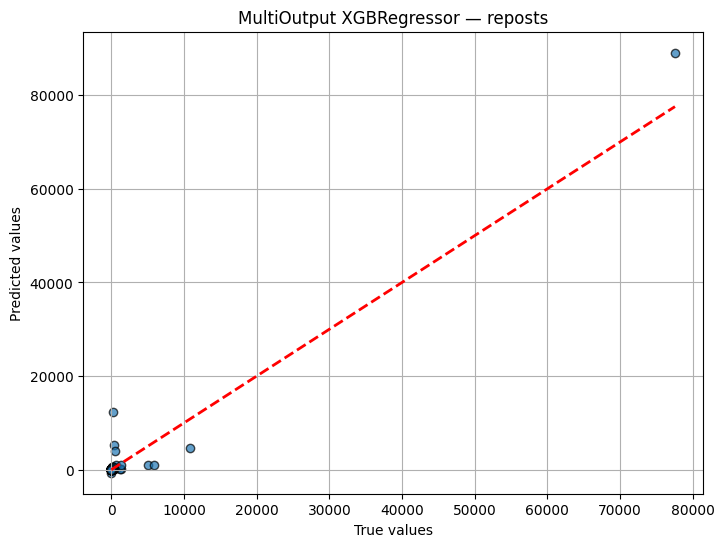

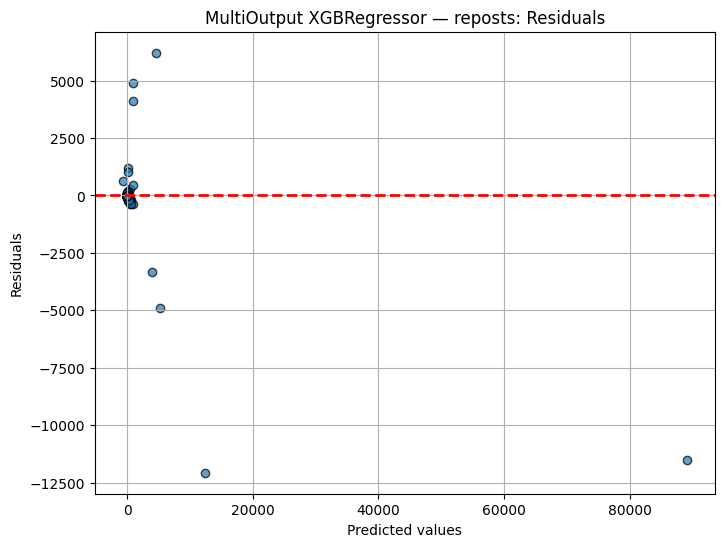

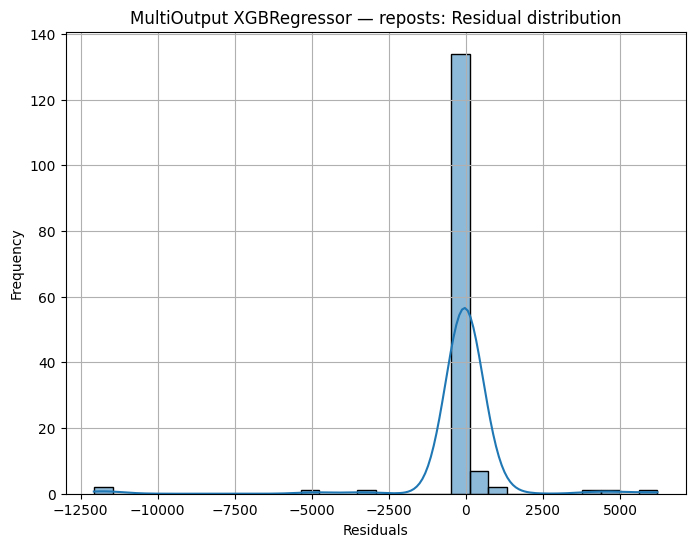


 Target bookmarks
MSE: 18213.2676, R²: 0.8764


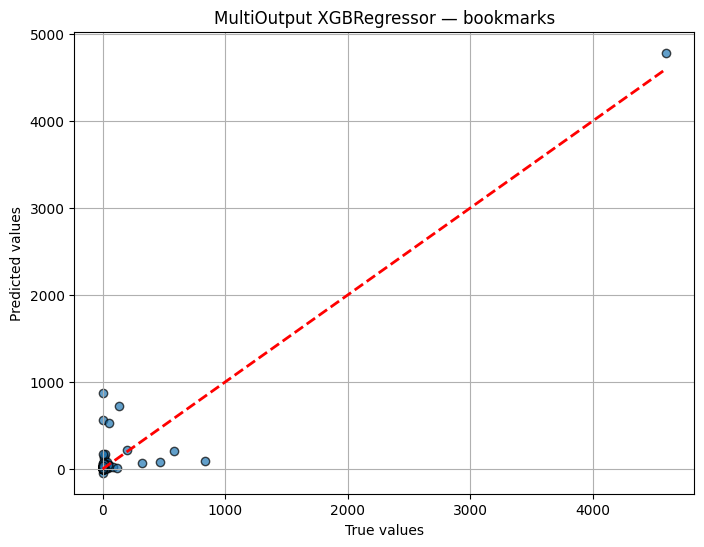

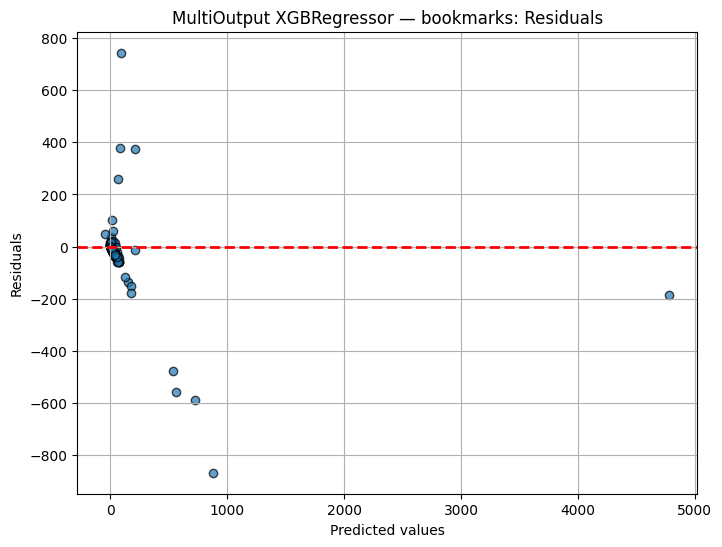

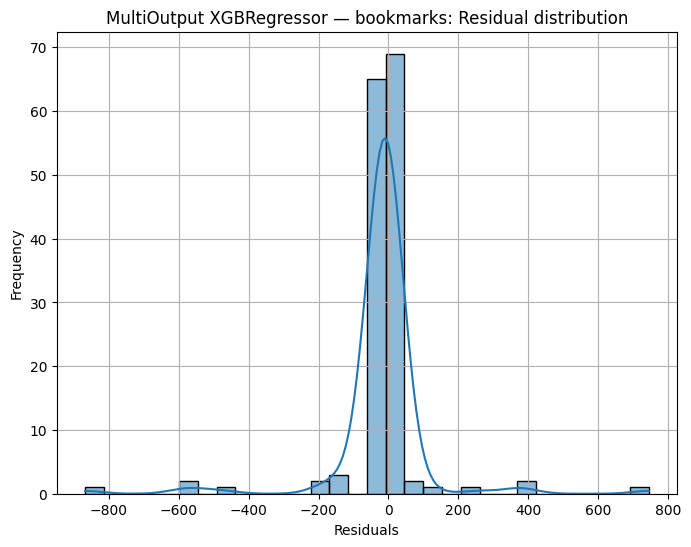

In [48]:
makeModelAssumptionMulti(
    xTrainTwitter, xTestTwitter,
    yTrainTwitter, yTestTwitter,
    multi_xgb,
    paramGridXGB,
    modelName="MultiOutput XGBRegressor"
)


## Sentence-BERT + MLP

### Texts Embedding

Embedding is a numerical vector representation of data (such as text, images, or users) that captures its meaning and relationships.

In short, embeddings map complex objects into a continuous vector space where similar items are close to each other.

In [49]:
def numeral_features_and_text(df, text_column='description'):
    numeric_df = df.select_dtypes(include=['number']).copy()

    cols_to_drop = ['id', 'post_id']
    numeric_df = numeric_df.drop(columns=[c for c in cols_to_drop if c in numeric_df.columns], errors='ignore')

    if text_column in df.columns:
        numeric_df[text_column] = df[text_column].astype(object)
    return numeric_df

twitter_numeral_and_text_df = numeral_features_and_text(twitter_selected_df, text_column='description')

In [50]:
xTrainTwitter, xTestTwitter, yTrainTwitter, yTestTwitter = split_dataset(
    twitter_numeral_and_text_df,
    target_columns=['views', 'replies', 'likes', 'reposts', 'bookmarks']
)
print(xTrainTwitter.shape)
print(yTrainTwitter.shape)
print(xTestTwitter.shape)
print(yTestTwitter.shape)

(850, 13)
(850, 5)
(150, 13)
(150, 5)


In [51]:
from sentence_transformers import SentenceTransformer

from sklearn.preprocessing import StandardScaler


text_model = SentenceTransformer("all-MiniLM-L6-v2")

text_col = "description"

train_texts = xTrainTwitter.get(text_col, pd.Series([])).fillna("").astype(str).tolist()
test_texts = xTestTwitter.get(text_col, pd.Series([])).fillna("").astype(str).tolist()

X_text_train = text_model.encode(
    train_texts,
    batch_size=32,
    show_progress_bar=True
)

X_text_test = text_model.encode(
    test_texts,
    batch_size=32,
    show_progress_bar=True
)

text_scaler = StandardScaler()

X_text_train = text_scaler.fit_transform(X_text_train)
X_text_test = text_scaler.transform(X_text_test)

num_cols_train = xTrainTwitter.select_dtypes(include=[np.number]).columns.tolist()
num_cols_test = xTestTwitter.select_dtypes(include=[np.number]).columns.tolist()

num_cols = [c for c in num_cols_train if c in num_cols_test]

X_num_train = xTrainTwitter[num_cols].fillna(0).values.astype(np.float32) if num_cols else np.zeros((len(X_text_train), 0), dtype=np.float32)
X_num_test = xTestTwitter[num_cols].fillna(0).values.astype(np.float32) if num_cols else np.zeros((len(X_text_test), 0), dtype=np.float32)

X_train = np.hstack([X_text_train, X_num_train])
X_test = np.hstack([X_text_test, X_num_test])

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

y_train = np.log1p(yTrainTwitter["views"].values)
y_test = np.log1p(yTestTwitter["views"].values)

print(X_text_train.shape)
print(X_text_test.shape)

print(np.isnan(X_text_train).sum(), np.isinf(X_text_train).sum())
print(np.isnan(X_text_test).sum(), np.isinf(X_text_test).sum())

Batches:   0%|          | 0/27 [00:00<?, ?it/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

X_train shape: (850, 396)
X_test shape: (150, 396)
(850, 384)
(150, 384)
0 0
0 0


In [52]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    alpha=1e-3,          
    learning_rate_init=1e-4,
    max_iter=500,
    early_stopping=True,
    random_state=42
)

mlp.fit(X_train, y_train)

y_pred_log = mlp.predict(X_test)
y_pred = np.expm1(y_pred_log)

print("R² (log space):", r2_score(y_test, y_pred_log))

R² (log space): -44439.27495345853


/var/folders/7h/ywl51fkn3mjc6tr44bbfj2z80000gn/T/ipykernel_53449/2565514707.py:16: RuntimeWarning: overflow encountered in expm1
  y_pred = np.expm1(y_pred_log)


Ridge (Ridge Regression) is a linear regression model with L2 regularization.

It adds a penalty on large coefficients to make the model more stable and less prone to overfitting, especially when features are many and highly correlated (e.g., text embeddings).

In short: Ridge = Linear Regression + L2 penalty, commonly used as a strong and reliable baseline.

In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10.0)
ridge.fit(X_train, y_train)

y_pred_log = ridge.predict(X_test)
y_pred = np.expm1(y_pred_log)

print("R² (log space):", r2_score(y_test, y_pred_log))

R² (log space): 0.3666126053552059


/Users/alexander/Desktop/KOI/.venv/lib/python3.13/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=1.92808e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [54]:
import os
import joblib
from pathlib import Path

# Save Ridge + preprocessing artifacts for Django app
# (Path is relative to this notebook location)
ARTIFACT_PATH = (Path('..') / 'predictor_app' / 'ml_artifacts' / 'ridge_views.joblib').resolve()
ARTIFACT_PATH.parent.mkdir(parents=True, exist_ok=True)

bundle = {
    'model': ridge,
    'text_scaler': text_scaler,
    'num_cols': num_cols,
    'text_model_name': 'sklearn.linear_modelRidge',
}

joblib.dump(bundle, ARTIFACT_PATH)
print('Saved:', ARTIFACT_PATH)
print('num_cols:', num_cols)

Saved: /Users/alexander/Desktop/KOI/ICT728/ICT728_project/predictor_app/ml_artifacts/ridge_views.joblib
num_cols: ['date_posted', 'photos', 'hashtags', 'followers', 'posts_count', 'following', 'videos', 'description_error_count', 'swear_word_count', 'word_count', 'emoji_count', 'uppercase_word_count']


For noisy, real-world data like social media engagement:

R² close to 1.0 is unrealistic

0.3–0.5 is often already very strong. (In my case near 60 % have right prediction)

0.0–0.2 can still be useful for ranking or decision support


 Target views
MSE: 1.3560, R²: 0.3666


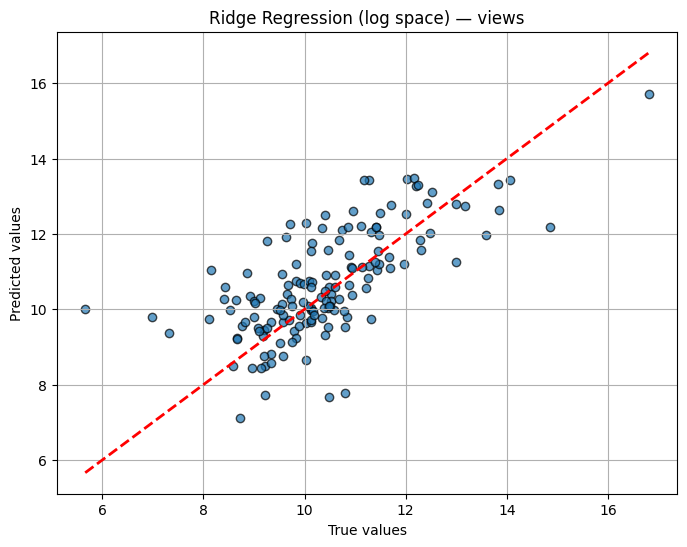

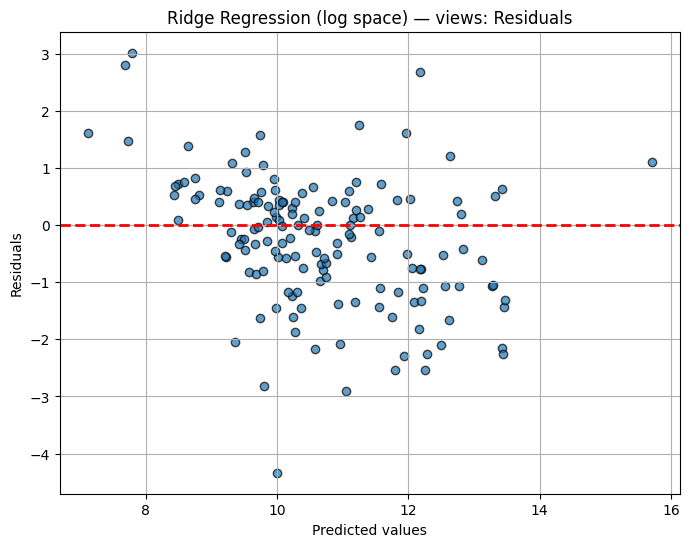

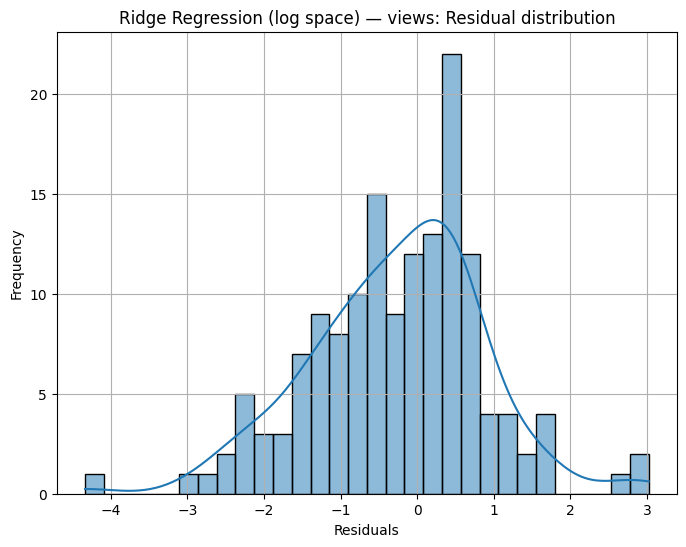

In [55]:
import numpy as np
import pandas as pd

y_test_df = pd.DataFrame(y_test, columns=['views'])
y_pred_log_arr = np.array(y_pred_log).reshape(-1, 1) 
modelQualityCheckMulti(y_test_df, y_pred_log_arr, "Ridge Regression (log space)")

## XGBRegressor with embedded text features

/Users/alexander/Desktop/KOI/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [22:44:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "estimator__colsample_bytree", "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators", "estimator__subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/alexander/Desktop/KOI/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [22:44:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "estimator__colsample_bytree", "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators", "estimator__subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/alexander/Desktop/KOI/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [22:44:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "estimator__colsample_bytree", "esti


 Target views
MSE: 1.4870, R²: 0.3054


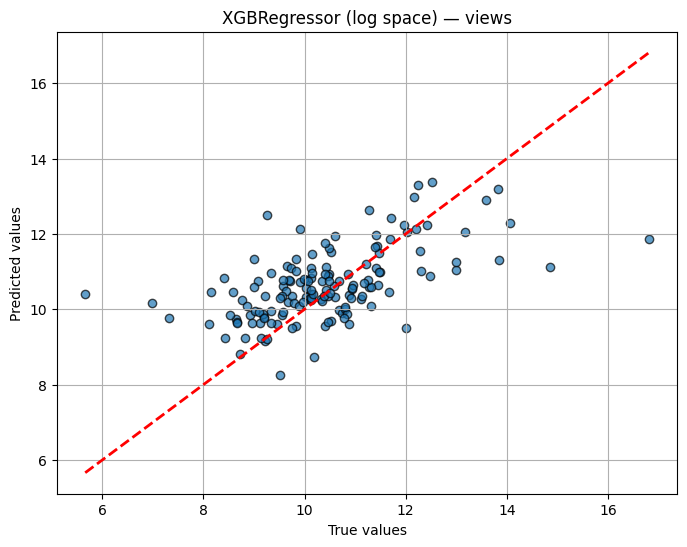

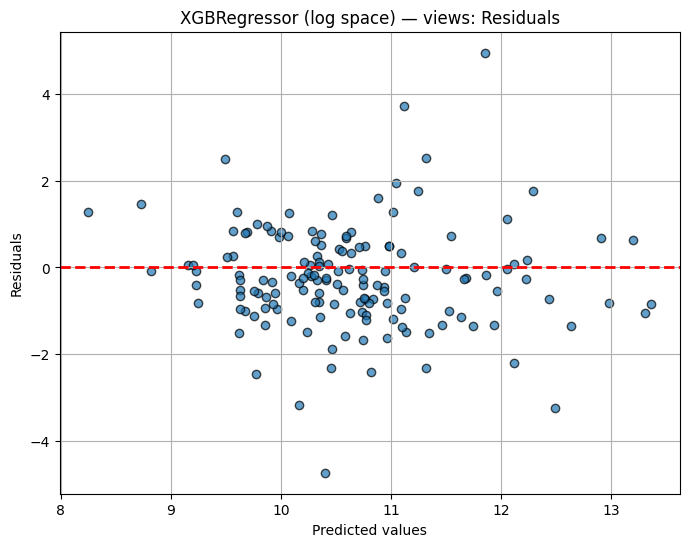

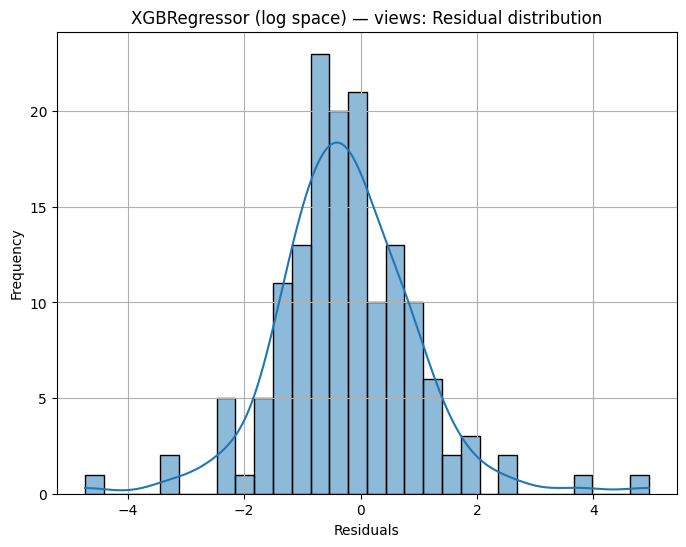

In [56]:

xgb_base = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

paramGridXGB = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [3, 5],
    'estimator__learning_rate': [0.05, 0.1],
    'estimator__subsample': [0.8, 1.0],
    'estimator__colsample_bytree': [0.8, 1.0]
}

gridSearch = GridSearchCV(
    estimator=xgb_base,
    param_grid=paramGridXGB,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gridSearch.fit(X_text_train, y_train)

bestModel = gridSearch.best_estimator_

y_pred = bestModel.predict(X_text_test)


y_test_df = pd.DataFrame(y_test, columns=['views'])
y_pred_log_arr = np.array(y_pred).reshape(-1, 1) 
modelQualityCheckMulti(y_test_df, y_pred_log_arr, "XGBRegressor (log space)")

In [57]:
import joblib
from pathlib import Path

# Save XGBoost GridSearch best model for Django app
# Tries to use `bestModel` if it exists, otherwise `gridSearch.best_estimator_`.
XGB_ARTIFACT_PATH = (Path('..') / 'predictor_app' / 'ml_artifacts' / 'xgb_views.joblib').resolve()
XGB_ARTIFACT_PATH.parent.mkdir(parents=True, exist_ok=True)

model_to_save = bestModel

bundle = {
    'model': model_to_save,
    'text_scaler': text_scaler,
    'num_cols': num_cols,
    'text_model_name': 'XGBRegressor',
}

joblib.dump(bundle, XGB_ARTIFACT_PATH)


['/Users/alexander/Desktop/KOI/ICT728/ICT728_project/predictor_app/ml_artifacts/xgb_views.joblib']